Comparatively evaluate the datasets

In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import load_exp_summary
from itertools import product

dir_pipeline = Path(".").resolve().parents[1]
dir_1 = dir_pipeline / "1_mechanistic_model"
sys.path.append(str(dir_1))

from reference_ruoff import (
    SPECIES_IDS,
    OBSERVED,
    OBSERVABLES_IDS,
    NOISE_PARAMETER_IDS,
    TRAINING_ENDPOINT,
    TEST_ENDPOINT,
    NOISE_PERCENTAGES,
    DATASET_SIZES,
)

problem_name = "ruoff_atp_consumption"
experiment_name = "2024_07_22_Ruoff_Grid"
metric = "negLL_obs_trainval"
metric_norm = metric + "_norm" 

dir_opt_output = dir_pipeline / "5_optimisation" / experiment_name
dir_output = Path(".").resolve() / "evaluation"
dir_output.mkdir(exist_ok=True)

In [2]:
summary = load_exp_summary(dir_opt_output)
data_settings = product(NOISE_PERCENTAGES, DATASET_SIZES)

# calculate a normalised likelihood for comparison between data sets
summary[metric_norm] = summary[metric] / summary["sparsity"]

In [3]:
best_ude_nrs = []
for (noise, n_datapoints) in data_settings:
    best = summary.query(
        "noise_level == @noise & (sparsity == @n_datapoints)"
    ).sort_values(by=metric).iloc[0]["ude_nr"]
    best_ude_nrs.append(best)

summary_of_best = summary.query("ude_nr in @best_ude_nrs")

In [4]:
summary_of_best.pivot(index="noise_level", columns="sparsity", values=metric_norm)

sparsity,50,100,150,200
noise_level,,,,
5,-1.076636,-1.020950,-1.007295,-1.038636
10,-0.853189,-0.825322,-0.803096,-0.831727
20,-0.705576,-0.561931,-0.609130,-0.612847
35,-0.442908,-0.415183,-0.408745,-0.450408


In [5]:
summary_of_best.pivot(index="noise_level", columns="sparsity", values=metric)

sparsity,50,100,150,200
noise_level,,,,
5,-53.831796,-102.094957,-151.094226,-207.727174
10,-42.659456,-82.532186,-120.464398,-166.345469
20,-35.278807,-56.193122,-91.369556,-122.569347
35,-22.145395,-41.518295,-61.311682,-90.081625


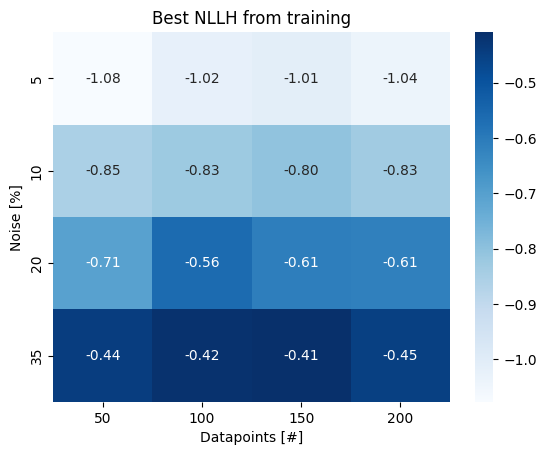

In [6]:
ax = sns.heatmap(
    summary_of_best.pivot(index="noise_level", columns="sparsity", values=metric_norm),
    annot=True, # summary_of_best.pivot(index="noise_level", columns="sparsity", values=metric),
    fmt=".2f",
    cmap="Blues",
)
ax.set(xlabel="Datapoints [#]", ylabel="Noise [%]")
ax.set_title("Best NLLH from training")
fp_output = dir_output / "heatmap_train.svg"
ax.figure.savefig(fp_output)

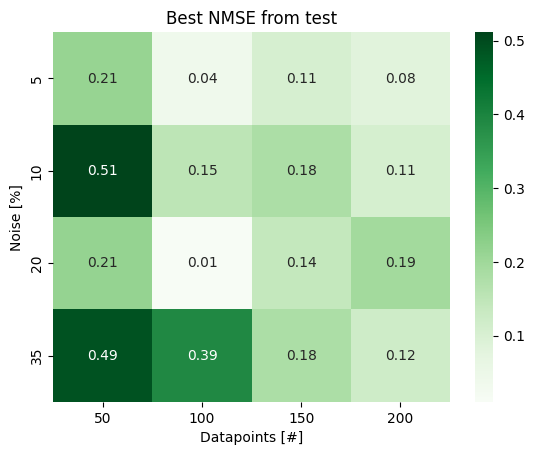

In [7]:
# heatmap test losses
ax = sns.heatmap(
    summary_of_best.pivot(index="noise_level", columns="sparsity", values="nmse_obs_test"),
    annot=True,
    fmt=".2f",
    cmap="Greens",
)
ax.set(xlabel="Datapoints [#]", ylabel="Noise [%]")
ax.set_title("Best NMSE from test")
fp_output = dir_output / "heatmap_test.svg"
ax.figure.savefig(fp_output)

NMSE on trainval observables

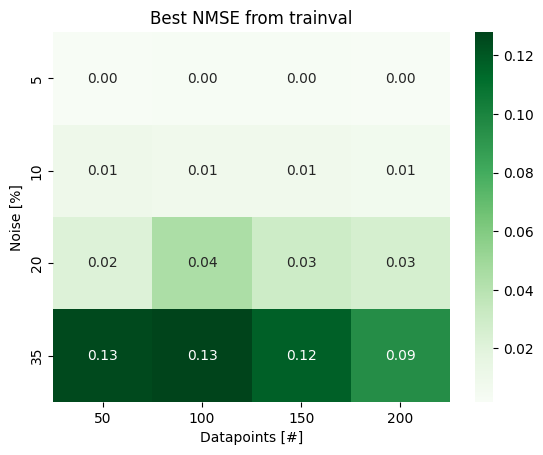

In [8]:
# heatmap test losses
ax = sns.heatmap(
    summary_of_best.pivot(index="noise_level", columns="sparsity", values="nmse_obs_trainval"),
    annot=True,
    fmt=".2f",
    cmap="Greens",
)
ax.set(xlabel="Datapoints [#]", ylabel="Noise [%]")
ax.set_title("Best NMSE from trainval")
fp_output = dir_output / "heatmap_nmse_obs_trainval.svg"
ax.figure.savefig(fp_output)